# Forecasting running data

In [26]:
#os.getcwd()
#os.listdir()

In [27]:
from datetime import date
import os 
today = date.today()


for file in os.listdir():
    if file.endswith('.ipynb'):
        cd=today
        os.rename(file, f'{today}-{file}')

In [29]:
import shutil

shutil.copy(
    os.path.join('2021-06-19-health_data.ipynb'),
    os.path.join('../git-repos/Kearney_Data_Science/_notebooks')
)

'../git-repos/Kearney_Data_Science/_notebooks/2021-06-19-health_data.ipynb'

In [26]:
import sqlalchemy as db
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

engine = db.create_engine('sqlite:///../../Downloads/fitbit.db')
connection = engine.connect()
metadata = db.MetaData()



sql = """
select DATE(date_time) as day
, sum(distance_miles) as distance
from distance_v
group by DATE(date_time)
"""

cnxn = connection

df = pd.read_sql(sql, cnxn)

df

,day,distance
0,2020-12-02,11.238989
1,2020-12-03,7.615898
2,2020-12-04,11.392033
3,2020-12-05,9.929077
4,2020-12-06,10.442889
...,...,...
186,2021-06-08,0.935723
187,2021-06-09,4.844334
188,2021-06-10,8.554417
189,2021-06-11,6.167171


In [27]:
df['ds'] = df.day
df['y'] = df.distance

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       191 non-null    object 
 1   distance  191 non-null    float64
 2   ds        191 non-null    object 
 3   y         191 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.1+ KB


In [29]:
import statsmodels.api as sm
import pandas as pd
from prophet import Prophet

In [30]:
import pandas as pd
pd.set_option('compute.use_numexpr', False)

m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
551,2022-06-08
552,2022-06-09
553,2022-06-10
554,2022-06-11
555,2022-06-12


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
551,2022-06-08,9.954126,5.626830,14.090458
552,2022-06-09,11.067850,6.415623,15.269029
553,2022-06-10,9.524963,5.164365,13.816646
554,2022-06-11,10.393233,5.943450,14.634128
555,2022-06-12,11.320983,6.836854,15.647303


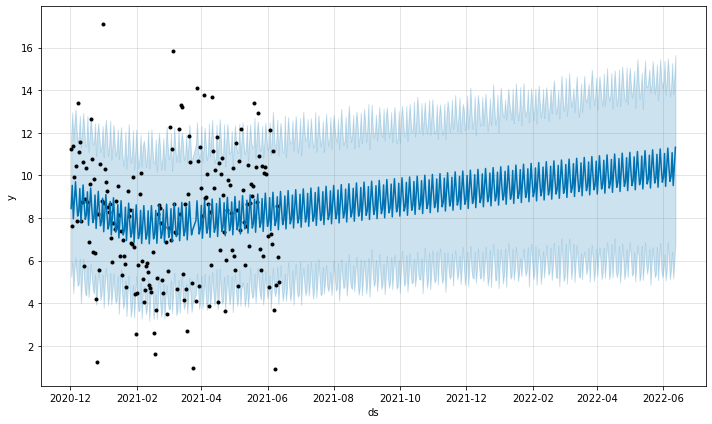

In [33]:
fig1 = m.plot(forecast)

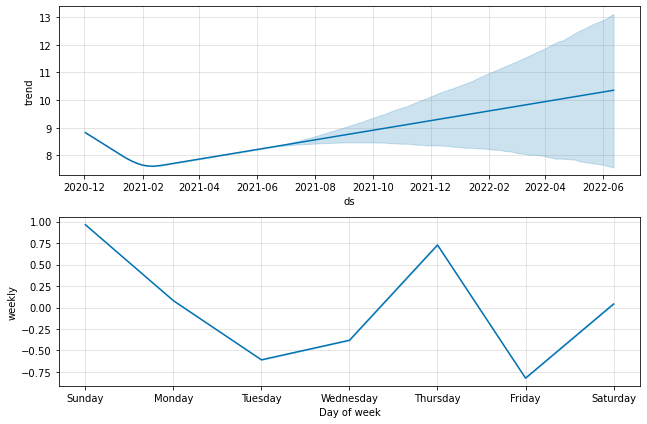

In [34]:
fig2 = m.plot_components(forecast)

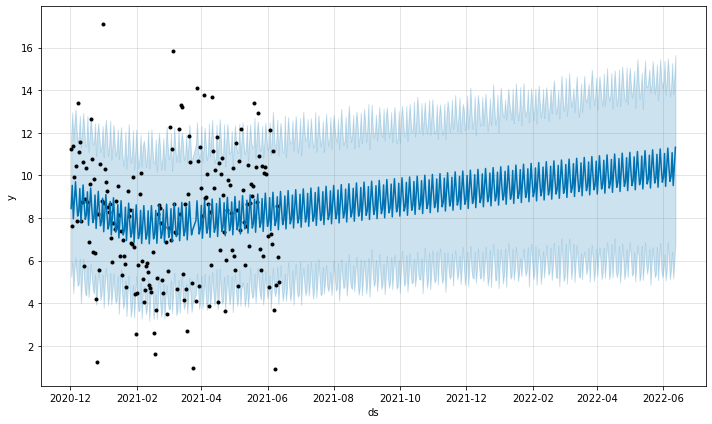

In [35]:
# Python
fig1 = m.plot(forecast)

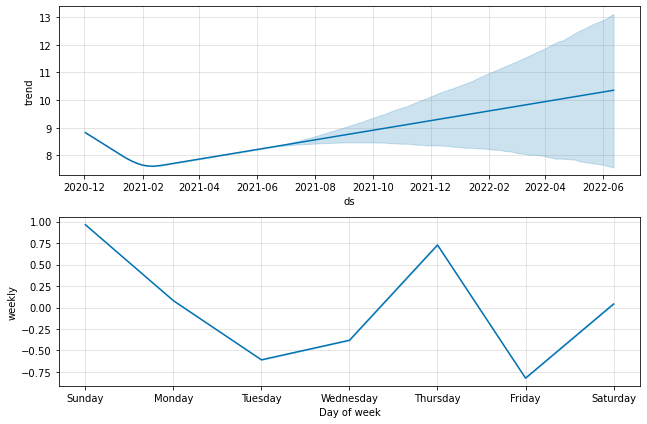

In [36]:
# Python
fig2 = m.plot_components(forecast)

In [37]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [38]:
# Python
plot_components_plotly(m, forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


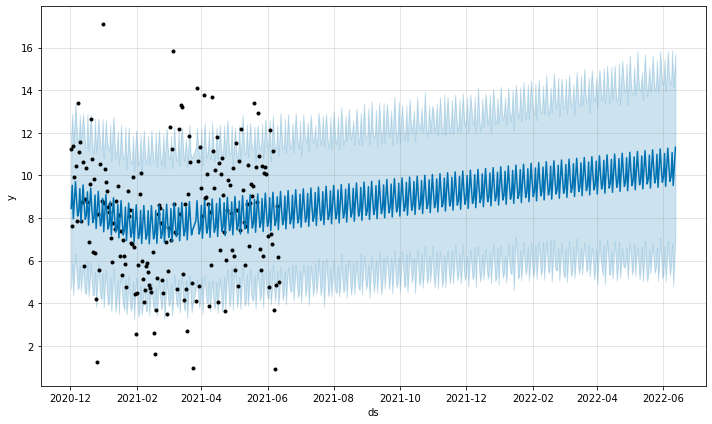

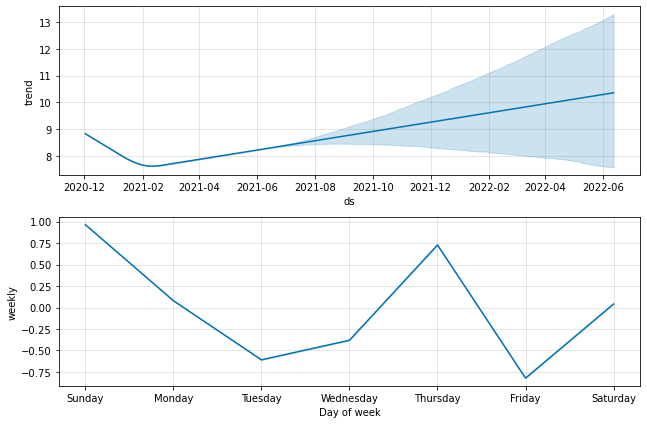

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-02,8.826908,4.690634,11.818085,8.826908,8.826908,-0.380921,-0.380921,-0.380921,-0.380921,-0.380921,-0.380921,0.0,0.0,0.0,8.445987
1,2020-12-03,8.805304,5.826039,12.902548,8.805304,8.805304,0.727109,0.727109,0.727109,0.727109,0.727109,0.727109,0.0,0.0,0.0,9.532413
2,2020-12-04,8.783700,4.373529,11.382860,8.783700,8.783700,-0.821473,-0.821473,-0.821473,-0.821473,-0.821473,-0.821473,0.0,0.0,0.0,7.962227
3,2020-12-05,8.762096,5.593958,12.411443,8.762096,8.762096,0.041102,0.041102,0.041102,0.041102,0.041102,0.041102,0.0,0.0,0.0,8.803198
4,2020-12-06,8.740492,6.342656,13.346898,8.740492,8.740492,0.963158,0.963158,0.963158,0.963158,0.963158,0.963158,0.0,0.0,0.0,9.703650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,2022-06-08,10.335047,5.742947,14.393370,7.579529,13.222686,-0.380921,-0.380921,-0.380921,-0.380921,-0.380921,-0.380921,0.0,0.0,0.0,9.954126
552,2022-06-09,10.340742,6.769705,15.861835,7.575976,13.239863,0.727109,0.727109,0.727109,0.727109,0.727109,0.727109,0.0,0.0,0.0,11.067850
553,2022-06-10,10.346436,4.792225,14.159937,7.573519,13.261637,-0.821473,-0.821473,-0.821473,-0.821473,-0.821473,-0.821473,0.0,0.0,0.0,9.524963
554,2022-06-11,10.352131,5.946817,14.833565,7.570061,13.285497,0.041102,0.041102,0.041102,0.041102,0.041102,0.041102,0.0,0.0,0.0,10.393233


In [39]:
# Model fit
m = Prophet() #Instanticate from Prophet class. 
m.fit(df) # Fit the Prophet model.

# Predict
future = m.make_future_dataframe(periods=365) # Make future date data frame for the next 365 days (it gives daily because it follows the frequency in input dataframe by default).
forecast = m.predict(future) # Predict future value.

# Plot results
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()
forecast # Displaying various results in table format.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# Load test data: log-transformed daily page views for the Wikipedia page for Peyton Manning.

df['cap'] = 10 # Saturating maximum
df['floor'] = 7 # Saturating minimum

# Model setup
m = Prophet(growth='logistic')
m.add_country_holidays(country_name='US') # Adding US holiday regressor
m.fit(df) 

# Future data generation
future = m.make_future_dataframe(periods=365*5)
future['cap'] = 10 # Saturating maximum
future['floor'] = 7 # Saturating minimum

# Future forecast
forecast = m.predict(future) 

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


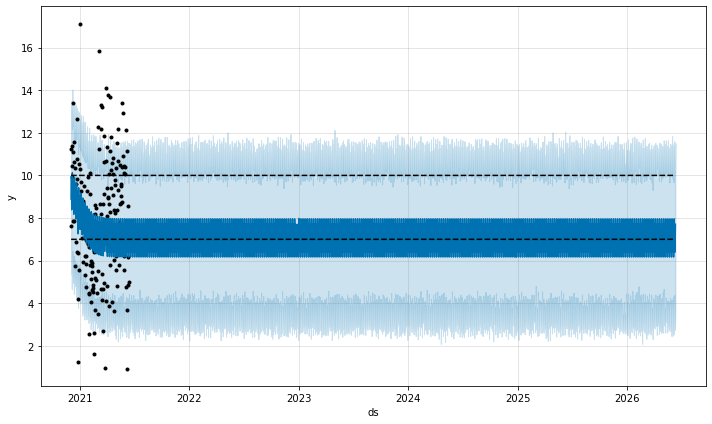

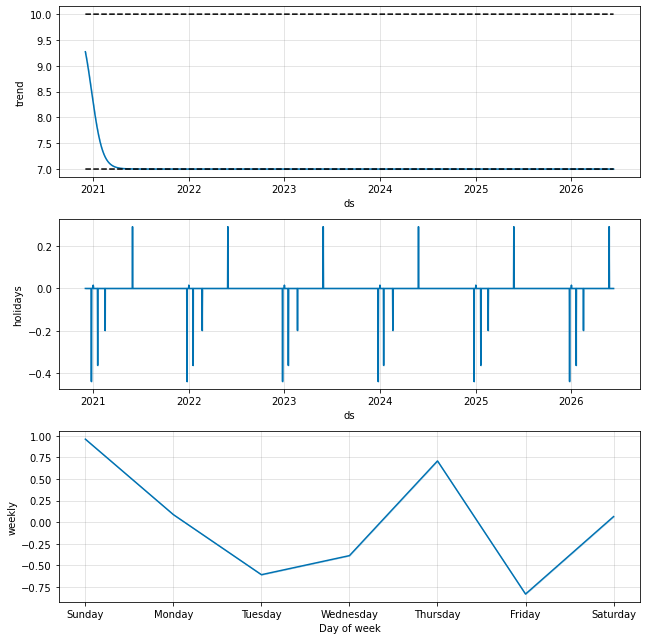

In [41]:

# Visualize
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season) #on_season dummy.
df['off_season'] = ~df['ds'].apply(is_nfl_season) #off_season dummy.

# set user-defined seasonality and fit
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
m.fit(df)

# Make the same columns to future data.
future = m.make_future_dataframe(periods=365*5) # Make future date data frame for the next 365 days (it gives daily because it follows the frequency in input dataframe by default).
future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)

# Predict future value.
forecast = m.predict(future)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


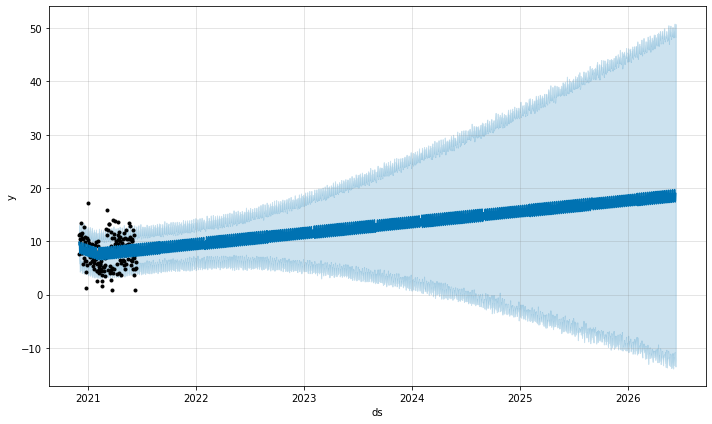

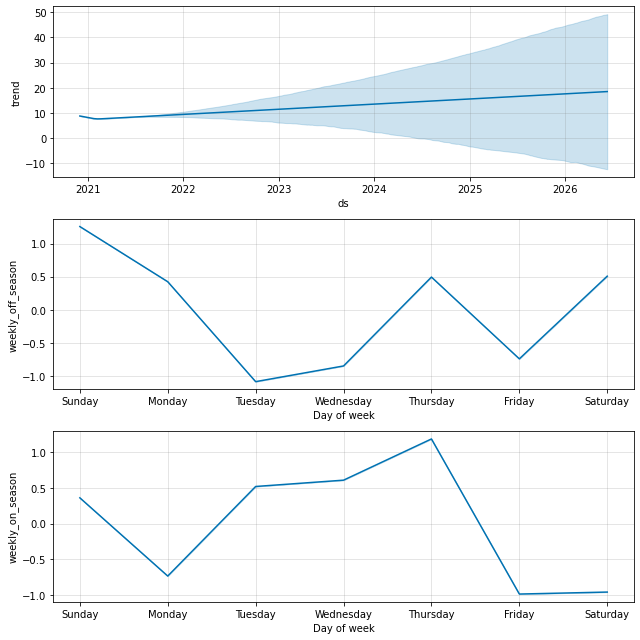

In [43]:
# Plot results
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()

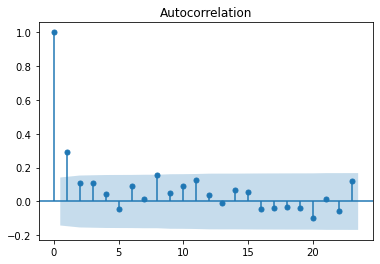

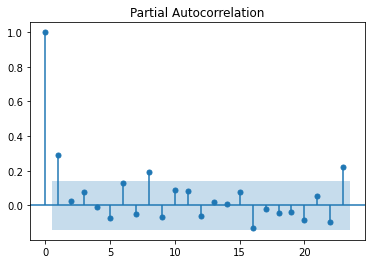

In [44]:
# After getting forecast dataframe using user-defined seasonality "on-season"/"off-season" above...

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

df['ds'] = pd.to_datetime(df['ds'],format='%Y-%m-%d')
df_res = df.merge(forecast,how="inner",on="ds")
df_res['residual'] = df_res['y'] - df_res['yhat']
plot_acf(df_res['residual'])
plot_pacf(df_res['residual'])
plt.show()